### CMIP6 Data from Google Cloud Storage

Details on CMIP data can be found here: https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit

This notebook follows from these articles:

https://medium.com/pangeo/cmip6-in-the-cloud-five-ways-96b177abe396

https://github.com/pangeo-data/pangeo-cmip6-examples/blob/master/intake_ESM_example.ipynb

### Import statements

We need `intake`, `intake-esm`.  Install them in the `clim680` environment.

In [34]:
import xarray as xr
import pandas as pd
import intake
import matplotlib.pyplot as plt

### Open the intake catalog

This is a table that can be turned into a pandas Dataframe.  It gives us a standard set of information about the available data.

We can then search on that information to find what datasets we want.

In [35]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

/homes/kpegion/.conda/envs/clim680/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,unique
activity_id,15
institution_id,34
source_id,79
experiment_id,107
member_id,213
table_id,30
variable_id,392
grid_label,10
zstore,294669
dcpp_init_year,60


In [36]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,AerChemMIP,AS-RCEC,TaiESM1,histSST,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/AerChemMIP/AS-RCEC/TaiESM1/histSST/...,NaN,20200310
1,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrbc,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190718
2,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrdust,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127
3,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmroa,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190809
4,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127


### What are the possible experiments I can choose from?

In [37]:
print(col.df.experiment_id.unique())

['histSST' 'piClim-CH4' 'piClim-NTCF' 'piClim-control' 'ssp370'
 'hist-1950HC' 'piClim-2xDMS' 'piClim-2xdust' 'piClim-2xfire'
 'piClim-2xss' 'piClim-BC' 'piClim-HC' 'piClim-N2O' 'piClim-OC'
 'piClim-SO2' 'piClim-aer' '1pctCO2-bgc' '1pctCO2-rad' 'esm-ssp585'
 'hist-bgc' 'amip-4xCO2' 'amip-future4K' 'amip-m4K' 'amip-p4K' 'amip'
 'abrupt-2xCO2' 'abrupt-solp4p' 'abrupt-0p5xCO2' 'amip-lwoff'
 'amip-p4K-lwoff' 'aqua-4xCO2' 'abrupt-solm4p' 'aqua-control-lwoff'
 'aqua-control' 'aqua-p4K-lwoff' 'aqua-p4K' '1pctCO2' 'abrupt-4xCO2'
 'historical' 'piControl' 'esm-hist' 'esm-piControl' 'ssp126' 'ssp245'
 'ssp585' 'esm-piControl-spinup' 'piControl-spinup' 'hist-GHG' 'hist-aer'
 'hist-nat' 'hist-CO2' 'hist-sol' 'hist-stratO3' 'hist-volc' 'ssp245-GHG'
 'ssp245-aer' 'ssp245-nat' 'ssp245-stratO3' 'dcppA-hindcast' 'dcppA-assim'
 'dcppC-hindcast-noAgung' 'dcppC-hindcast-noElChichon'
 'dcppC-hindcast-noPinatubo' 'dcppC-amv-neg' 'dcppC-amv-pos'
 'dcppC-amv-ExTrop-neg' 'dcppC-amv-ExTrop-pos' 'dcppC-amv-Trop-

### Find the data for a specific experiment and model

In [38]:
cat = col.search(experiment_id='historical', 
                 table_id='Oyr', variable_id='o2',
                 grid_label='gn',institution_id='CCCma',
                source_id='CanESM5',
                member_id='r1i1p1f1')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Oyr,o2,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r1i1p...,NaN,20190429


### Get the names of the files we selected from Google cloud storage

In [40]:
datasets = cat.to_dataset_dict()
datasets
list(datasets.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.CCCma.CanESM5.historical.Oyr.gn']

In [51]:
ds = datasets['CMIP.CCCma.CanESM5.historical.Oyr.gn']
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 291, lev: 45, member_id: 1, time: 165, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * lev                 (lev) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-07-02 12:00:00 ... 2014-07-02 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(165, 2), meta=np.ndarray>
  * member_id           (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    o2                  (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 12, 45, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes:
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    YMDH_branch_time_in_parent:  5201:01:01:00
    activity_id:                 CMIP
    branch_method:               Spin-up documentation
    branch_time_in_child:        0.0
    branch_time_in_parent:       1223115.0
    cmor_version:                3.4.0
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    creation_date:               2019-05-02T13:43:39Z
    data_specs_version:          01.00.29
    experiment:                  all-forcing simulation of the recent past
    experiment_id:               historical
    external_variables:          areacello volcello
    forcing_index:               1
    frequency:                   yr
    further_info_url:            https://furtherinfo.es-doc.org/CMIP6.CCCma.C...
    grid:                        ORCA1 tripolar grid, 1 deg with refinement t...
    grid_label:                  gn
    history:                     2019-05-02T13:43:39Z ;rewrote data to be con...
    initialization_index:        1
    institution:                 Canadian Centre for Climate Modelling and An...
    institution_id:              CCCma
    license:                     CMIP6 model data produced by The Government ...
    mip_era:                     CMIP6
    nominal_resolution:          100 km
    parent_activity_id:          CMIP
    parent_experiment_id:        piControl
    parent_mip_era:              CMIP6
    parent_source_id:            CanESM5
    parent_time_units:           days since 1850-01-01 0:0:0.0
    parent_variant_label:        r1i1p1f1
    physics_index:               1
    product:                     model-output
    realization_index:           1
    realm:                       ocnBgchem
    references:                  Geophysical Model Development Special issue ...
    source:                      CanESM5 (2019): \naerosol: interactive\natmo...
    source_id:                   CanESM5
    source_type:                 AOGCM
    sub_experiment:              none
    sub_experiment_id:           none
    table_id:                    Oyr
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/20a231ca-ffe0-442b-b108-4821579...
    variable_id:                 o2
    variant_label:               r1i1p1f1
    version:                     v20190429
    status:   

In [52]:
ds['o2']

<xarray.DataArray 'o2' (member_id: 1, time: 165, lev: 45, j: 291, i: 360)>
dask.array<broadcast_to, shape=(1, 165, 45, 291, 360), dtype=float32, chunksize=(1, 12, 45, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
    latitude   (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * lev        (lev) float64 3.047 9.454 16.36 ... 5.126e+03 5.375e+03 5.625e+03
    longitude  (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time       (time) object 1850-07-02 12:00:00 ... 2014-07-02 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        'Mole concentration' means number of moles per unit volum...
    history:        meanm2y_mltby1em3
    long_name:      Dissolved Oxygen Concentration
    original_name:  O2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

Text(0.5, 1.0, 'Dissolved Oxygen Concentration[mol m-3]')

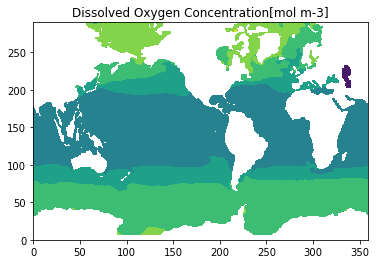

In [57]:
plt.contourf(ds['o2'][0,0,0,:,:])
plt.title('Dissolved Oxygen Concentration[mol m-3]')